# **ESERCITAZIONE DI IDROLOGIA**

<figure>
    <img src="Figures/logo uni.png" width="100" height="100/1.618">
<figure>
    
    UNIVERSITÀ DEGLI STUDI DI TRENTO
    DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA
    A.A. 2022-2023
      
    
*Alunni:*  
Del Dò Giacomo, 221545       
Faccin Francesca, 222028       
Rossato Sofia, 218790 

# **Notebook 4: Stima della LSPP**

Le curve di possibilità pluviometrica (LSPP) consentono, assegnato il tempo di ritorno, forniscono la relazione tra le altezze massime $(h)$ e le durate di pioggia $(t_p)$.   
Queste curve sono descritte da una legge di potenza:
\begin{equation}
{h(t_p, Tr)=a(Tr)·t_p^n}
\end{equation}

Per ottenere le coppie $(t_p, h)$, per ogni durata $(t_p)$ si interpola una distribuzione di Gumbel, si assegna il tempo di ritorno $(Tr)$ e si trova la probabilità. infine con il valore di probabilità, attraverso la curva di Gumbel, si trova l'altezza di precipitazione $(h)$ associata alla durata considerata inizialmente. 

In [1]:
import os
import math
import numpy as np
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

os.getcwd()
os.chdir("/Users/francescafaccin/Desktop/idrologia/Installations05122022/class2023/1_ESERCITAZIONE")
data = pd.read_csv('PluviometriaValdagno.txt')
map(datetime,data['Anno'])
data = data.set_index('Anno')

In [2]:
best = pd.read_pickle("best_param")
best

In [3]:
def qtls(df,qu):
    rv1h = gumbel_r(loc=df["a"], scale=df["b"])
    return rv1h.ppf(qu)

In [4]:
def h_g(bs,col,tr):
    return bs[col]["a"]+bs[col]["b"]*(-math.log(-math.log(1-1/tr)))

In [5]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q50=1-1/50
q100=1-1/100


def qtls(df,qu):
    rv1h = gumbel_r(loc=df["a"], scale=df["b"])
    return rv1h.ppf(qu)

pts = DataFrame([[qtls(best["1h"],q10),
                  qtls(best["3h"],q10),
                  qtls(best["6h"],q10),
                  qtls(best["12h"],q10),
                  qtls(best["24h"],q10)],
                 [qtls(best["1h"],q20),
                  qtls(best["3h"],q20),
                  qtls(best["6h"],q20),
                  qtls(best["12h"],q20),
                  qtls(best["24h"],q20)],
                 [qtls(best["1h"],q50),
                  qtls(best["3h"],q50),
                  qtls(best["6h"],q50),
                  qtls(best["12h"],q50),
                  qtls(best["24h"],q50)],
                 [qtls(best["1h"],q100),
                  qtls(best["3h"],q100),
                  qtls(best["6h"],q100),
                  qtls(best["12h"],q100),
                  qtls(best["24h"],q100)]], 
                index=[10,20,50,100],
                columns=[1,3,6,12,24]).T
pts

(50.0, 250.0)

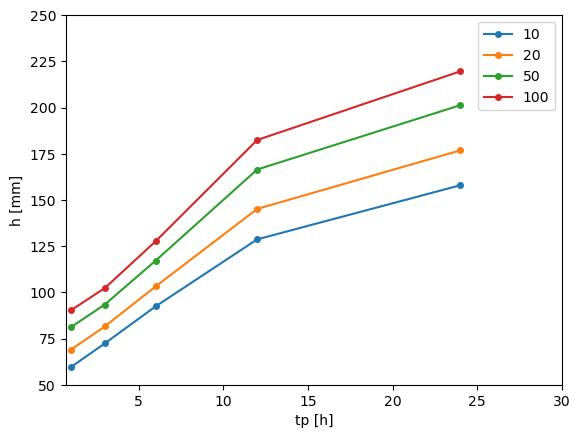

In [6]:
ag = pts.plot(style="o-", markersize=4)

ag.set_xlabel("tp [h]", fontsize=10)
ag.set_ylabel("h [mm]", fontsize=10)

plt.xlim([0.7, 30])
plt.ylim([50, 250])

(50, 250)

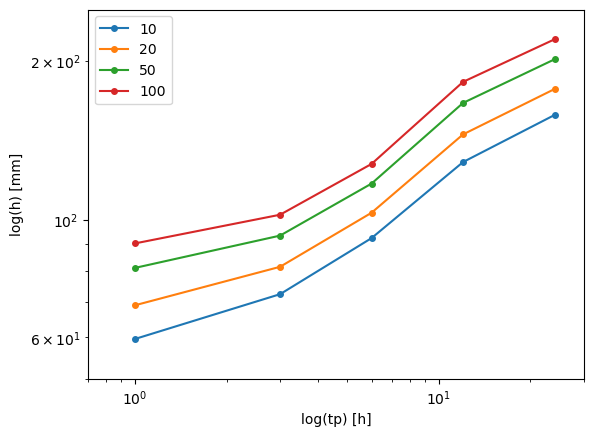

In [7]:
ag = pts.plot(style="o-", markersize=4)
ag.set_yscale('log')
ag.set_xscale('log')

ag.set_xlabel("log(tp) [h]", fontsize=10)
ag.set_ylabel("log(h) [mm]", fontsize=10)

plt.xlim([0.7, 30])
plt.ylim([50, 250])

In [8]:
f = [1,2,3,4]
g = [1,2,3,4]
np.polyfit(f,g,1)

in10 = np.polyfit(np.log(pts[10].index), np.log(pts[10]), 1)
in10[1] = np.exp(in10[1])

in20 = np.polyfit(np.log(pts[20].index), np.log(pts[20]), 1)
in20[1] = np.exp(in20[1])

in50 = np.polyfit(np.log(pts[50].index), np.log(pts[50]), 1)
in50[1] = np.exp(in50[1])

in100 = np.polyfit(np.log(pts[100].index), np.log(pts[100]), 1)
in100[1] = np.exp(in100[1])

fnl = DataFrame([in10,in20,in50,in100], index=[10,20,50,100], columns=["n","a"])
fnl

In [9]:
tp = np.linspace(0.7,30,100)
def h(tp,a,n):
    return a*tp**n

h10 = h(tp, fnl["a"][10], fnl["n"][10])
h20 = h(tp,fnl["a"][20], fnl["n"][20])
h50 = h(tp,fnl["a"][50], fnl["n"][50])
h100 = h(tp,fnl["a"][100], fnl["n"][100])

inh=DataFrame([h10,h20,h50,h100],
              index=["Tr=10","Tr=20","Tr=50","Tr=100"],
              columns=tp).T
inh

Text(0, 0.5, 'h [mm]')

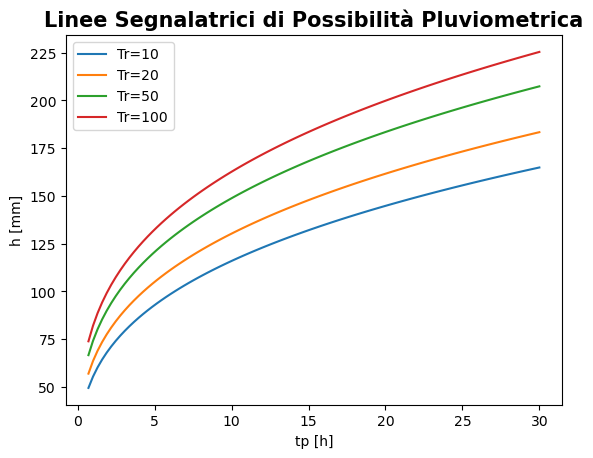

In [10]:
ag = inh.plot()

plt.title("Linee Segnalatrici di Possibilità Pluviometrica", fontsize=15, fontweight = "bold")
plt.xlabel("tp [h]", fontsize=10)
plt.ylabel("h [mm]", fontsize=10)

(50.0, 250.0)

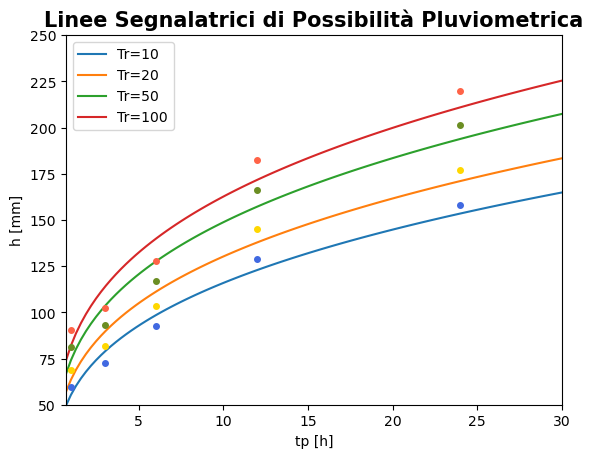

In [11]:
ag = inh.plot()
ag = plot(pts[10], "o", markersize=4, color="royalblue")
ag = plot(pts[20], "o", markersize=4, color="gold")
ag = plot(pts[50], "o", markersize=4, color="olivedrab")
ag = plot(pts[100], "o", markersize=4, color="tomato")

plt.title("Linee Segnalatrici di Possibilità Pluviometrica", fontsize=15, fontweight = "bold")
plt.xlabel("tp [h]", fontsize=10)
plt.ylabel("h [mm]", fontsize=10)

plt.xlim([0.7, 30])
plt.ylim([50, 250])

(50.0, 250.0)

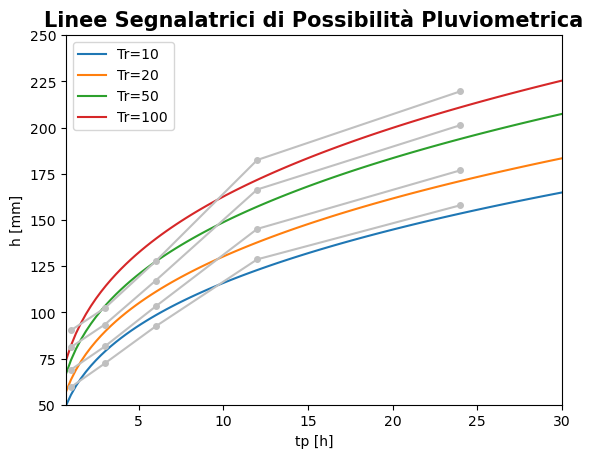

In [12]:
ag = inh.plot()

ag = plot(pts[10], "o-", markersize=4, color="silver")
ag = plot(pts[20], "o-", markersize=4, color="silver")
ag = plot(pts[50], "o-", markersize=4, color="silver")
ag = plot(pts[100], "o-", markersize=4, color="silver")

plt.title("Linee Segnalatrici di Possibilità Pluviometrica", fontsize=15, fontweight = "bold")
plt.xlabel("tp [h]", fontsize=10)
plt.ylabel("h [mm]", fontsize=10)

plt.xlim([0.7, 30])
plt.ylim([50, 250])

(50, 250)

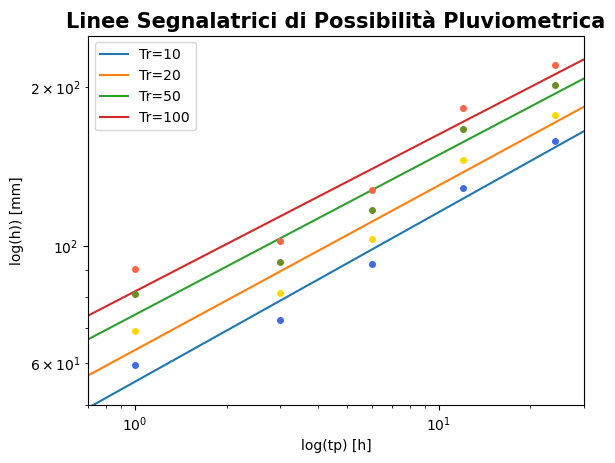

In [13]:
ag = inh.plot()
ag.set_yscale('log')
ag.set_xscale('log')
ag = plot(pts[10], "o", markersize=4, color="royalblue")
ag = plot(pts[20], "o", markersize=4, color="gold")
ag = plot(pts[50], "o", markersize=4, color="olivedrab")
ag = plot(pts[100], "o", markersize=4, color="tomato")

plt.title("Linee Segnalatrici di Possibilità Pluviometrica", fontsize=15, fontweight = "bold")
plt.xlabel("log(tp) [h]", fontsize=10)
plt.ylabel("log(h)) [mm]", fontsize=10)

plt.xlim([0.7, 30])
plt.ylim([50, 250])

(50, 250)

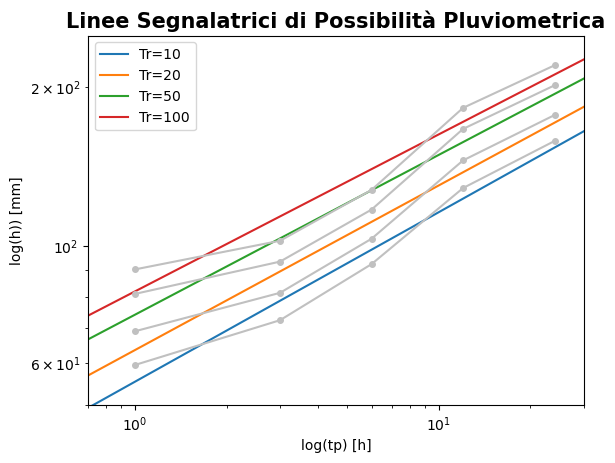

In [14]:
ag = inh.plot()
ag.set_yscale('log')
ag.set_xscale('log')
ag = plot(pts[10], "o-", markersize=4, color="silver")
ag = plot(pts[20], "o-", markersize=4, color="silver")
ag = plot(pts[50], "o-", markersize=4, color="silver")
ag = plot(pts[100], "o-", markersize=4, color="silver")

plt.title("Linee Segnalatrici di Possibilità Pluviometrica", fontsize=15, fontweight = "bold")
plt.xlabel("log(tp) [h]", fontsize=10)
plt.ylabel("log(h)) [mm]", fontsize=10)

plt.xlim([0.7, 30])
plt.ylim([50, 250])